<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

## Create and visualize Data

In [13]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

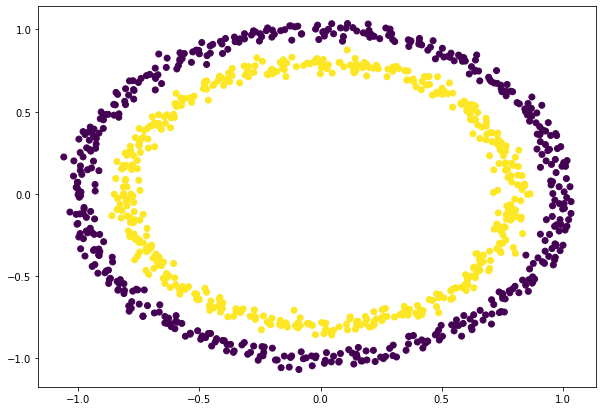

In [11]:
#Visualize with ah plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y)

## Split data


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## Modelling Experiments

In [25]:
def plot_training_curve(history):
  plt.figure(figsize=(10,7))
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss")
  plt.figure(figsize=(10,7))
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Accuracy")

### Model 1: Simple Dense

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(2,))
x = layers.Dense(1, activation="relu")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_0 = tf.keras.Model(inputs, outputs)

In [21]:
#Compile the model 
model_0.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [ ]:
#Fit the model 
history_model_0 = model_0.fit(x_train, y_train, 
                              epochs=100, 
                              validation_data=(x_test, y_test))

In [24]:
#Evaluate
model_0.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473612785339, 0.5]

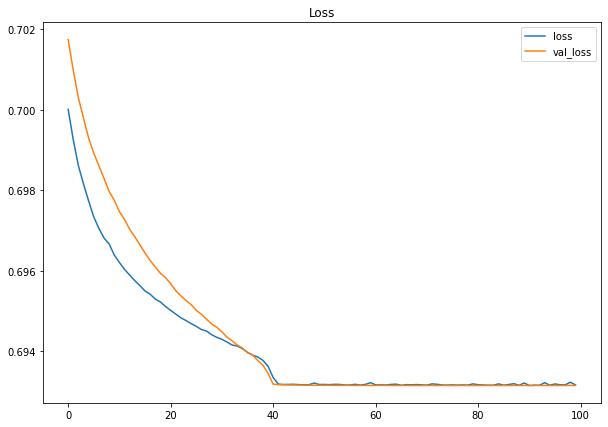

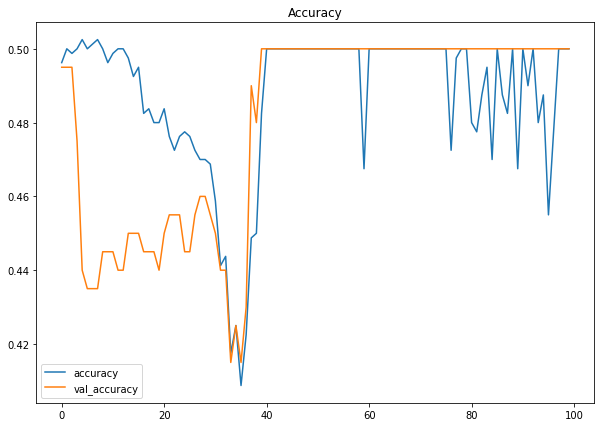

In [26]:
#Plot training curve
plot_training_curve(history_model_0)

### Model 1: Dense advanced

In [85]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(2,))
x = layers.Dense(6, activation="relu")(inputs)
x = layers.Dense(3, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [86]:
#Compile the model 
model_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [ ]:
#Fit the model 
history_model_1 = model_1.fit(x_train, y_train, 
                              epochs=140, 
                              validation_data=(x_test, y_test))

In [88]:
#Evaluate
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9950


[0.13206088542938232, 0.9950000047683716]

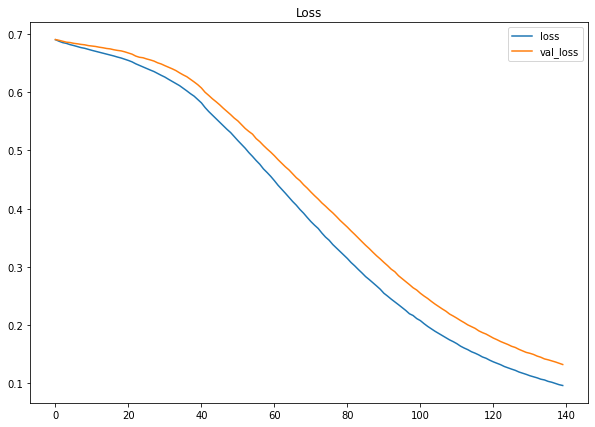

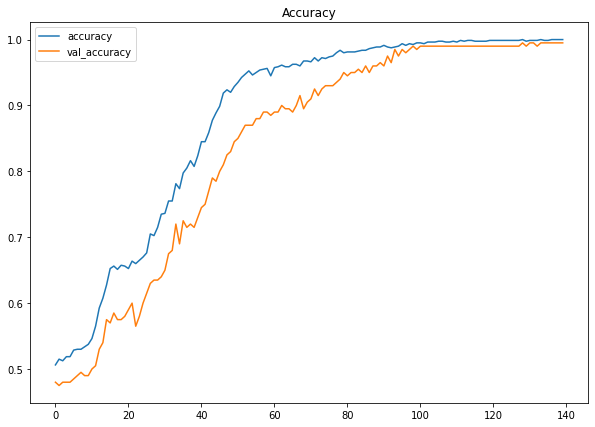

In [89]:
#Plot training curve
plot_training_curve(history_model_1)

# Multiclass Classification

## Download and visualize Data

In [91]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [92]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [95]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Bag')

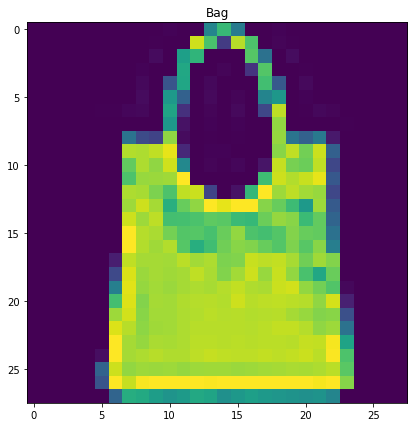

In [102]:
import random
val = random.randint(0, len(x_train))
plt.figure(figsize=(10,7))
plt.imshow(x_train[val])
plt.title(class_names[y_train[val]])